# Обучение без учителя. Задача кластеризации

## Загрузка и подготовка данных

make_classification

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data, data_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=110)

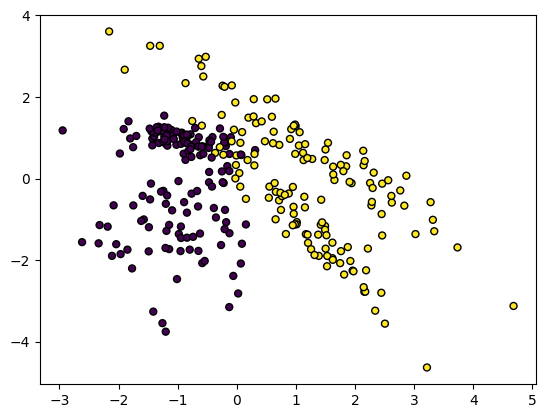

In [17]:
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")
plt.show()

make_blobs

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=3, n_features=2,
                  random_state=0)

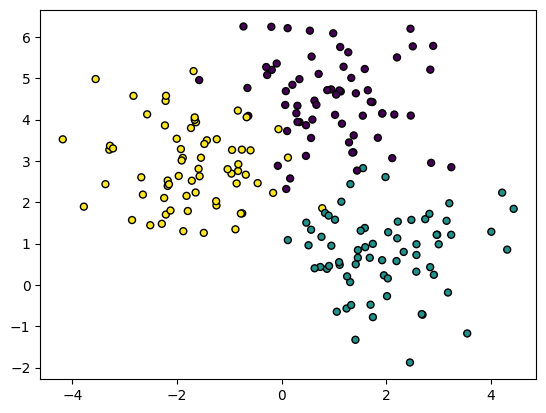

In [19]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

Diabetes dataset

In [ ]:
import pandas as pd

cdata = pd.read_csv('D:/PythonWork/Machine learning and big data/data/diabet_processed.csv', encoding='utf-8', delimiter=',')
cy = cdata['Diabetes_012']

In [8]:
cdata.drop(['Diabetes_012'], axis=1, inplace=True)
cdata

KeyError: "['Diabetes_012'] not found in axis"

## Алгоритмы на синтетических данных

### K-means

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(3, n_init='auto').fit(data)

d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


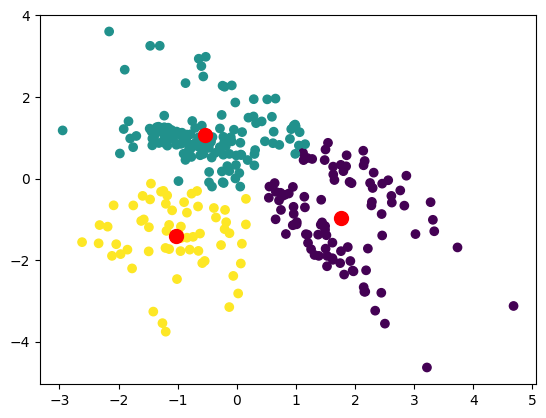

In [23]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

Метод локтя

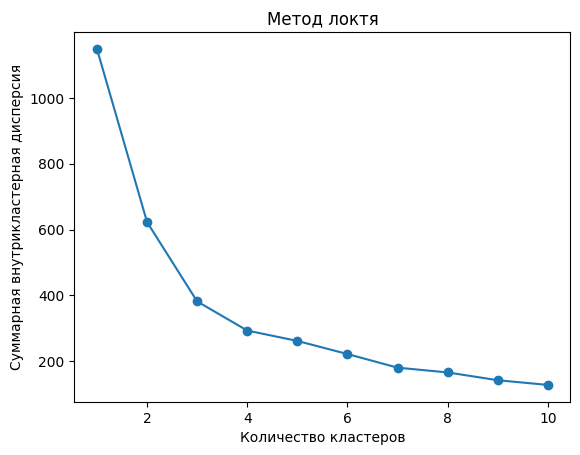

In [24]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(data)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Суммарная внутрикластерная дисперсия")
plt.show()

Оптимально: <b>3</b> кластера (снижение суммарной дисперсии становится менее выраженным)

Метод силуэтов

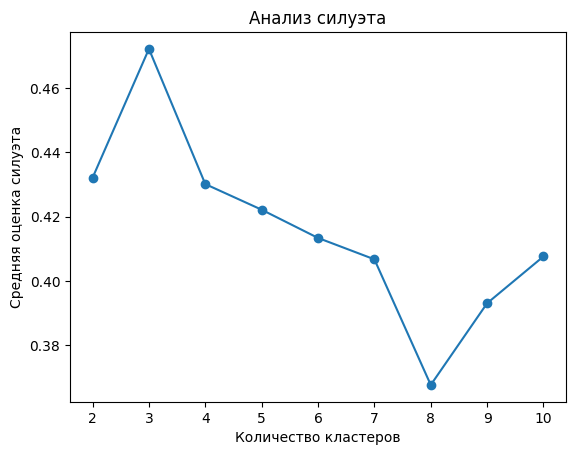

In [25]:
from sklearn.metrics import silhouette_score

silhouettes = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = km.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouettes.append(score)

plt.plot(range(2, 11), silhouettes, marker='o')
plt.title("Анализ силуэта")
plt.xlabel("Количество кластеров")
plt.ylabel("Средняя оценка силуэта")
plt.show()

Оптимально: <b>3</b> кластера (максимальный средний показатель силы)

Оценка модели

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import homogeneity_score

def get_internal_metrics(x_values, labels_values):
    sil_score = silhouette_score(x_values, labels_values)
    print(f"Средний индекс силуэта: {sil_score:.3f}")
    ch_score = calinski_harabasz_score(x_values, labels_values)
    print(f"Индекс Калински-Харабаша: {ch_score:.3f}")
    
def get_external_metrics(true_labels, received_labels):
    mi_score = normalized_mutual_info_score(true_labels, received_labels)
    print(f"Нормированная взаимная информация: {mi_score:.3f}")
    h_score = homogeneity_score(true_labels, received_labels)
    print(f"Уровень гомогеничности: {h_score:.3f}")
    

In [30]:
get_internal_metrics(data, kmeans.labels_)
get_external_metrics(data_y, kmeans.labels_)

Средний индекс силуэта: 0.472
Индекс Калински-Харабаша: 298.634
Нормированная взаимная информация: 0.414
Уровень гомогеничности: 0.517


Характеристики кластеров

In [42]:
copy_data = data
copy_data = pd.DataFrame(copy_data)

copy_data['cluster'] = kmeans.labels_

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

                0                             1                    
             mean    median       std      mean    median       std
cluster                                                            
0        1.762693  1.630293  0.779250 -0.958353 -0.862989  1.083764
1       -0.540782 -0.594343  0.760392  1.063071  0.972106  0.661809
2       -1.034597 -1.011645  0.697650 -1.395117 -1.337587  0.811274


### Иерархическая кластеризация

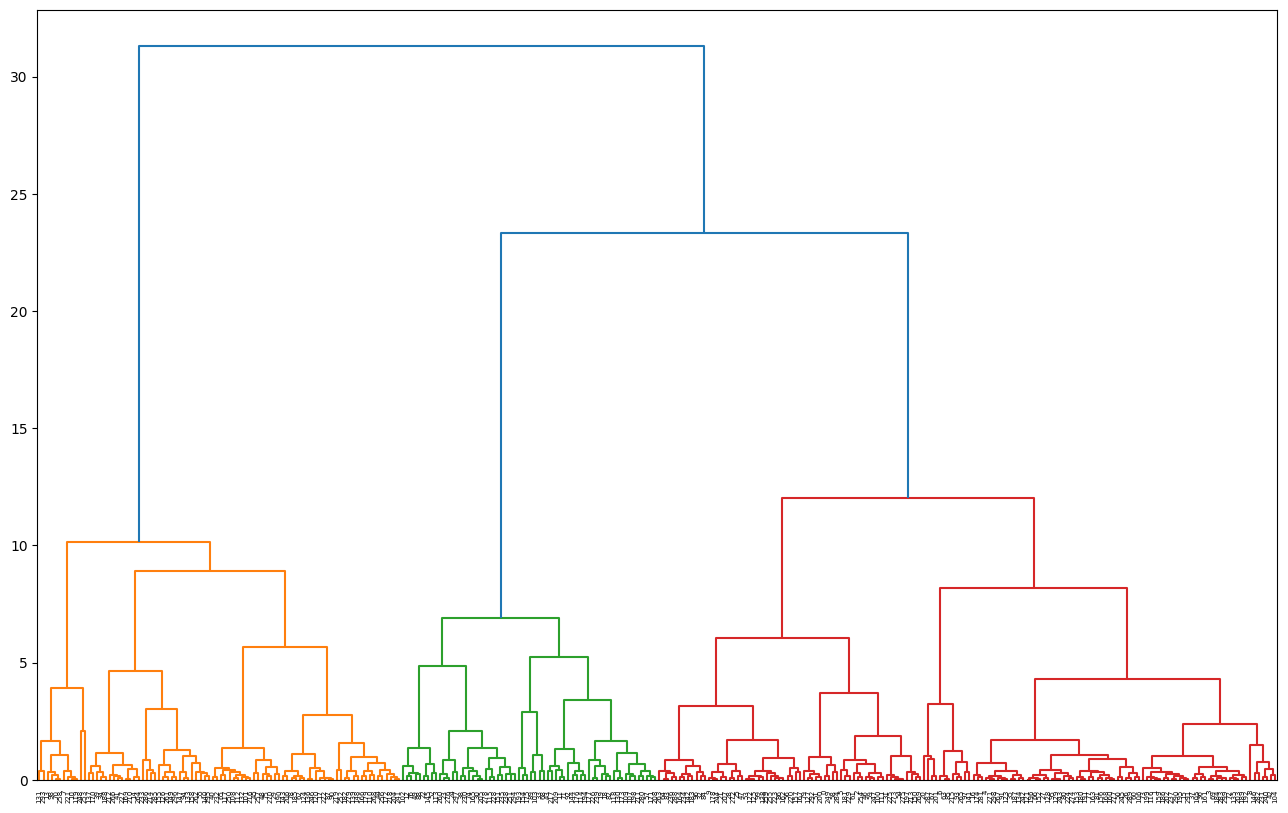

In [45]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(data, method='ward'))

In [46]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
hc_clusters = hc.fit_predict(data)

In [47]:
hc_clusters

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2,
       1, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2,
       2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1,
       0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0])

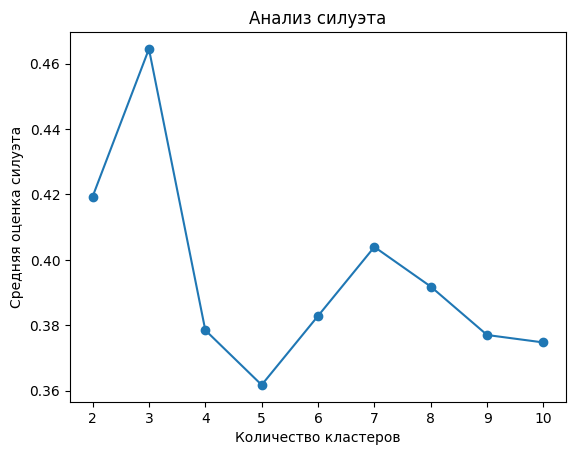

In [48]:
silhouettes = []
for i in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=i)
    labels = hc.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouettes.append(score)

plt.plot(range(2, 11), silhouettes, marker='o')
plt.title("Анализ силуэта")
plt.xlabel("Количество кластеров")
plt.ylabel("Средняя оценка силуэта")
plt.show()

In [49]:
get_internal_metrics(data, hc_clusters)
get_external_metrics(data_y, hc_clusters)

Средний индекс силуэта: 0.465
Индекс Калински-Харабаша: 292.451
Нормированная взаимная информация: 0.392
Уровень гомогеничности: 0.488


Характеристики кластеров

In [50]:
copy_data = data
copy_data = pd.DataFrame(copy_data)

copy_data['cluster'] = hc_clusters

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

                0                             1                    
             mean    median       std      mean    median       std
cluster                                                            
0       -0.450892 -0.545405  0.842490  1.048429  0.950229  0.650601
1        1.797767  1.754597  0.798031 -1.081429 -1.037280  1.029233
2       -1.033822 -0.999093  0.691935 -1.373582 -1.309128  0.822270


### DBSCAN

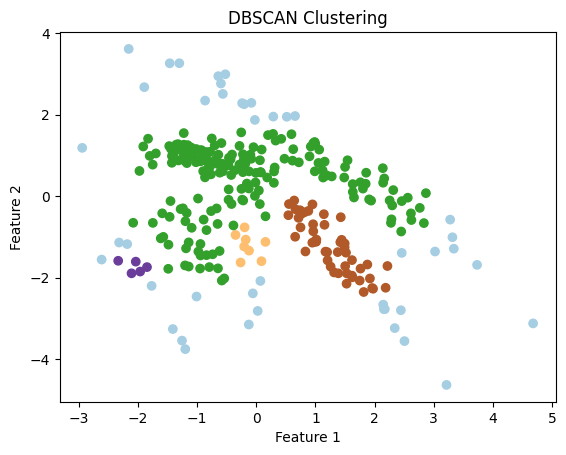

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=5)
clusters = dbscan.fit_predict(data)

plt.scatter(data[:, 0] , data[:, 1], c=clusters, cmap='Paired')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Подбор eps

In [18]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(data)
distances, indices = nbrs.kneighbors(data)
distances

array([[0.        , 0.14075262, 0.36792915, 0.44996652],
       [0.        , 0.03239929, 0.03600522, 0.07527797],
       [0.        , 0.11009673, 0.19382091, 0.21479119],
       ...,
       [0.        , 0.28260111, 0.32034932, 0.33287071],
       [0.        , 0.03065035, 0.05157891, 0.06290576],
       [0.        , 0.05460523, 0.06462845, 0.07566198]], shape=(300, 4))

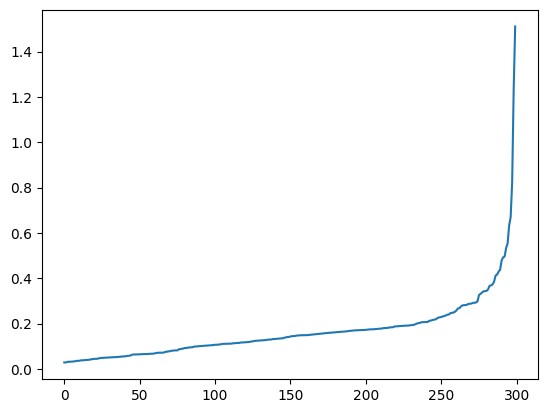

In [ ]:
import numpy as np

distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

eps = 0.35

[-1  0  1  2  3  4  5]


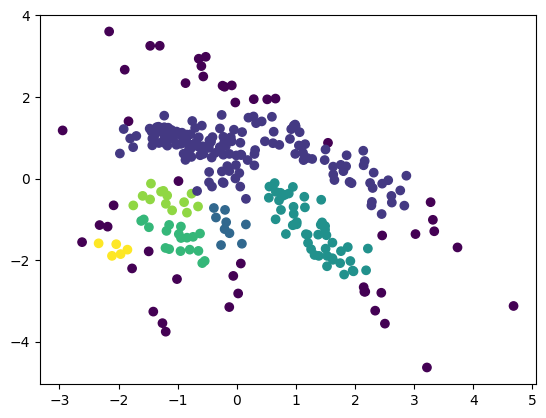

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.35, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

In [30]:
get_internal_metrics(data, dbscan.labels_)
get_external_metrics(data_y, dbscan.labels_)

Средний индекс силуэта: 0.090
Индекс Калински-Харабаша: 22.942
Нормированная взаимная информация: 0.217
Уровень гомогеничности: 0.328


In [53]:
scores = {}
for eps_val in np.arange(0.1, 1.0, 0.1):
    for min_samples_val in range(2, 10):
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        labels = dbscan.fit_predict(data)
        
        if len(set(labels)) >= 2:
            score = silhouette_score(data, labels)
            scores[(eps_val, min_samples_val)] = score

best_params = max(scores.items(), key=lambda x: x[1])
print(f"Лучшие параметры: eps={best_params[0][0]}, min_samples={best_params[0][1]} с силой силуэта {best_params[1]:.3f}")

Лучшие параметры: eps=0.9, min_samples=2 с силой силуэта 0.504


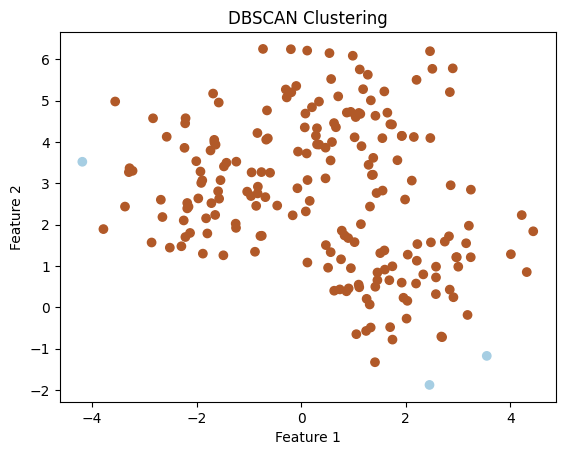

In [54]:
dbscan = DBSCAN(eps=best_params[0][0], min_samples=best_params[0][1])
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0] , X[:, 1], c=clusters, cmap='Paired')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [55]:
get_internal_metrics(X, clusters)
get_external_metrics(y, clusters)

Средний индекс силуэта: 0.353
Индекс Калински-Харабаша: 3.023
Нормированная взаимная информация: 0.012
Уровень гомогеничности: 0.006


Характеристики кластеров

In [56]:
copy_data = X
copy_data = pd.DataFrame(copy_data)

copy_data['cluster'] = clusters

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

                0                             1                    
             mean    median       std      mean    median       std
cluster                                                            
-1       0.605997  2.454314  4.186044  0.158984 -1.172321  2.935461
 0       0.405609  0.664718  1.807102  2.748809  2.758309  1.769505


## EM-алгоритм (Гауссовы смеси)

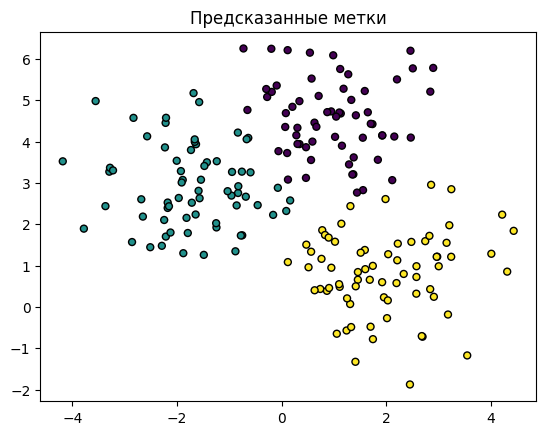

In [57]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels = gm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
plt.title('Предсказанные метки')

plt.show()

In [58]:
cov_types = ["full", "tied", "diag", "spherical"]
results = {}

for cov_type in cov_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(X)
    results[cov_type] = gmm.bic(X)

best_cov_type = min(results, key=results.get)
print(f"Лучший тип ковариационной матрицы: {best_cov_type}, BIC: {results[best_cov_type]}")

Лучший тип ковариационной матрицы: spherical, BIC: 1563.2072470286794


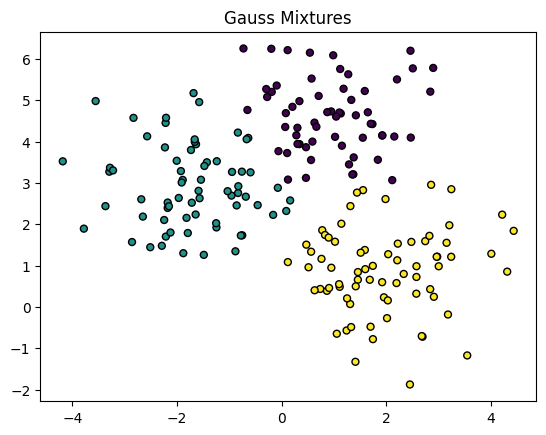

In [59]:
gm = GaussianMixture(n_components=3, covariance_type=best_cov_type, random_state=42)
labels = gm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
plt.title('Gauss Mixtures')

plt.show()

In [60]:
get_internal_metrics(X, labels)
get_external_metrics(y, labels)

Средний индекс силуэта: 0.499
Индекс Калински-Харабаша: 264.761
Нормированная взаимная информация: 0.799
Уровень гомогеничности: 0.798


Характеристики кластеров

In [61]:
copy_data = X
copy_data = pd.DataFrame(copy_data)

copy_data['cluster'] = labels

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

                0                             1                    
             mean    median       std      mean    median       std
cluster                                                            
0        0.959785  0.986770  0.875094  4.626912  4.637462  0.878803
1       -1.716562 -1.673712  0.940924  2.912612  2.780044  0.974987
2        1.970453  1.746255  1.007991  0.868918  0.949829  1.022120


### Affinity Proragation

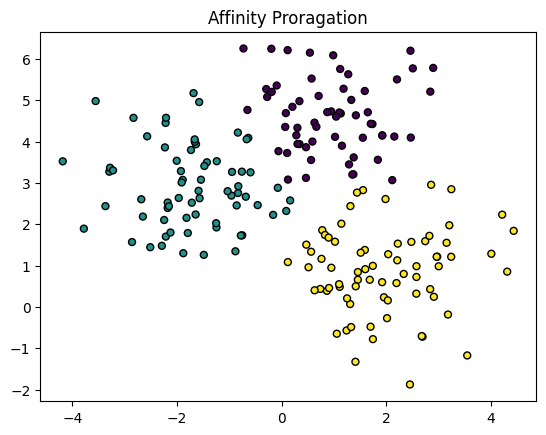

In [63]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(random_state=5)
preds = clustering.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
plt.title('Affinity Proragation')

plt.show()

In [64]:
dampings = [0.5, 0.6, 0.7, 0.8, 0.9]
results = {}

for damp in dampings:
    ap = AffinityPropagation(damping=damp, preference=-50)
    labels = ap.fit_predict(X)
    num_clusters = len(np.unique(labels))
    results[damp] = {"clusters": num_clusters, "stability": ap.n_iter_}

best_damping = sorted(results.keys(), key=lambda x: results[x]['stability'])[-1]
print(f"Оптимальный damping фактор: {best_damping}")

Оптимальный damping фактор: 0.9


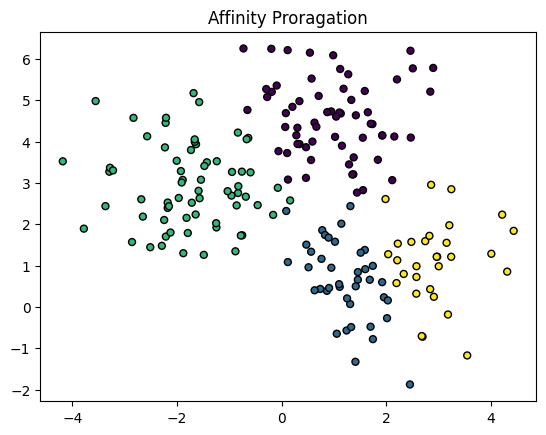

In [69]:
clustering = AffinityPropagation(random_state=5, damping=best_damping)
preds = clustering.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
plt.title('Affinity Proragation')

plt.show()

In [70]:
get_internal_metrics(X, preds)
get_external_metrics(y, preds)

Средний индекс силуэта: 0.348
Индекс Калински-Харабаша: 199.873
Нормированная взаимная информация: 0.519
Уровень гомогеничности: 0.831


Характеристики кластеров

In [71]:
copy_data = X
copy_data = pd.DataFrame(copy_data)

copy_data['cluster'] = preds

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

                0                             1                    
             mean    median       std      mean    median       std
cluster                                                            
0       -3.528479 -3.369974  0.348730  3.255601  3.305163  0.964802
1        1.974145  1.927563  0.690249  5.507903  5.568170  0.416007
2        1.989250  1.746255  0.772692 -0.820391 -0.704394  0.462846
3        0.025224 -0.094483  0.497100  5.537839  5.358239  0.575010
4        2.439256  2.335192  0.406226  0.655054  0.599873  0.469596
5        1.776746  1.721334  0.432000  3.510791  3.505657  0.652960
6       -1.699095 -1.662854  0.563854  3.966906  3.995626  0.571532
7        3.371653  3.207599  0.649369  1.625628  1.574572  0.521952
8        0.655248  0.628358  0.435037  4.320593  4.355733  0.432667
9        1.053289  1.021025  0.419551  0.968742  0.949829  0.538549
10      -0.630132 -0.769978  0.524840  2.561684  2.681815  0.544715
11      -2.094811 -2.140275  0.381622  2.090579 

## Алгоритмы на данных для классификации (Diabetes_012)

### k-means

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(3, n_init='auto').fit(cdata)

Метод локтя

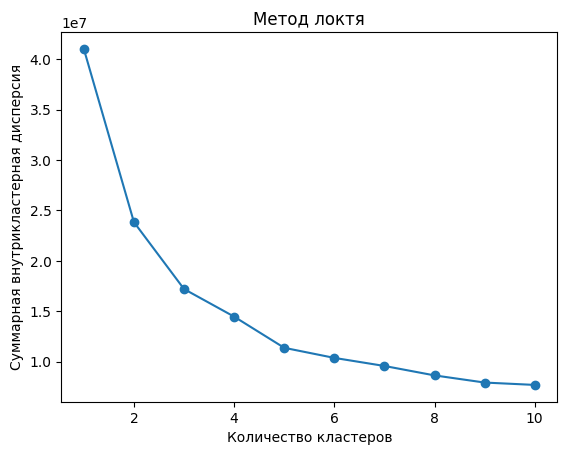

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(cdata)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Суммарная внутрикластерная дисперсия")
plt.show()

Метод силуэтов

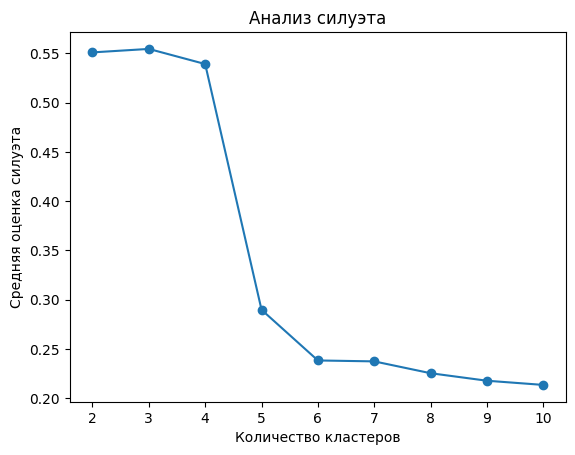

In [47]:
from sklearn.metrics import silhouette_score

silhouettes = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = km.fit_predict(cdata)
    score = silhouette_score(cdata[:300], labels[:300])
    silhouettes.append(score)

plt.plot(range(2, 11), silhouettes, marker='o')
plt.title("Анализ силуэта")
plt.xlabel("Количество кластеров")
plt.ylabel("Средняя оценка силуэта")
plt.show()

In [42]:
get_internal_metrics(cdata[:300], kmeans.labels_[:300])
get_external_metrics(cy, kmeans.labels_)

Средний индекс силуэта: 0.555
Индекс Калински-Харабаша: 227.904
Нормированная взаимная информация: 0.017
Уровень гомогеничности: 0.018


Характеристики кластеров

In [74]:
copy_data = cdata
copy_data = pd.DataFrame(copy_data[:300])

copy_data['cluster'] = kmeans.labels_[:300]

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

           HighBP                   HighChol                  CholCheck  \
             mean median       std      mean median       std      mean   
cluster                                                                   
0        0.526316    1.0  0.501956  0.589474    1.0  0.494539  0.989474   
1        0.583333    1.0  0.494727  0.527778    1.0  0.500970  0.972222   
2        0.573770    1.0  0.498632  0.606557    1.0  0.492568  0.983607   

                                BMI  ...       Sex       Age                   \
        median       std       mean  ...       std      mean median       std   
cluster                              ...                                        
0          1.0  0.102598  27.757895  ...  0.497924  9.284211    9.0  2.443677   
1          1.0  0.164909  28.055556  ...  0.487559  8.777778    9.0  2.627037   
2          1.0  0.128037  28.213115  ...  0.488669  8.606557    9.0  2.794511   

        Education                     Income                  

### DBSCAN

In [96]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=3)
clusters = dbscan.fit_predict(cdata[:30000])

In [97]:
scores = {}
for eps_val in np.arange(0.1, 1.0, 0.1):
    for min_samples_val in range(2, 10):
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        labels = dbscan.fit_predict(cdata[:5000])
        
        if len(set(labels)) >= 2:
            score = silhouette_score(cdata[:5000], labels)
            scores[(eps_val, min_samples_val)] = score

best_params = max(scores.items(), key=lambda x: x[1])
print(f"Лучшие параметры: eps={best_params[0][0]}, min_samples={best_params[0][1]} с силой силуэта {best_params[1]:.3f}")

Лучшие параметры: eps=0.1, min_samples=3 с силой силуэта -0.317


In [101]:
dbscan = DBSCAN(eps=best_params[0][0], min_samples=best_params[0][1])
clusters = dbscan.fit_predict(cdata[:30000])

get_internal_metrics(cdata[:30000], clusters)
get_external_metrics(cy[:30000], clusters)

Средний индекс силуэта: -0.511
Индекс Калински-Харабаша: 1.354
Нормированная взаимная информация: 0.011
Уровень гомогеничности: 0.008


Характеристики кластеров

In [111]:
copy_data = cdata[:600]
copy_data = pd.DataFrame(copy_data)

copy_data['cluster'] = clusters[:600]

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

           HighBP                   HighChol                  CholCheck  \
             mean median       std      mean median       std      mean   
cluster                                                                   
-1       0.589615    1.0  0.492316  0.537688    1.0  0.498996  0.976549   
 0       0.000000    0.0       NaN  0.000000    0.0       NaN  1.000000   
 1       0.000000    0.0       NaN  0.000000    0.0       NaN  1.000000   
 2       0.000000    0.0       NaN  0.000000    0.0       NaN  1.000000   

                                BMI  ...       Sex       Age                   \
        median       std       mean  ...       std      mean median       std   
cluster                              ...                                        
-1         1.0  0.151457  28.289782  ...  0.479452  9.060302    9.0  2.647599   
 0         1.0       NaN  32.000000  ...       NaN  5.000000    5.0       NaN   
 1         1.0       NaN  24.000000  ...       NaN  6.000000    6.0  

### EM-алгоритм

In [84]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels = gm.fit_predict(cdata)

In [79]:
cov_types = ["full", "tied", "diag", "spherical"]
results = {}

for cov_type in cov_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(X)
    results[cov_type] = gmm.bic(X)

best_cov_type = min(results, key=results.get)
print(f"Лучший тип ковариационной матрицы: {best_cov_type}, BIC: {results[best_cov_type]}")

Лучший тип ковариационной матрицы: spherical, BIC: 1563.2072470286794


In [85]:
gm = GaussianMixture(n_components=3, covariance_type=best_cov_type, random_state=42)
labels = gm.fit_predict(cdata)

In [87]:
get_internal_metrics(cdata[:1000], labels[:1000])
get_external_metrics(cy[:1000], labels[:1000])

Средний индекс силуэта: 0.543
Индекс Калински-Харабаша: 724.918
Нормированная взаимная информация: 0.008
Уровень гомогеничности: 0.009


Характеристики классов

In [93]:
copy_data = cdata
copy_data = pd.DataFrame(copy_data[:200])

copy_data['cluster'] = labels[:200]

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

           HighBP                   HighChol                  CholCheck  \
             mean median       std      mean median       std      mean   
cluster                                                                   
0        0.587302    1.0  0.496274  0.587302    1.0  0.496274  0.968254   
1        0.550000    1.0  0.503831  0.725000    1.0  0.452203  1.000000   
2        0.582090    1.0  0.496938  0.477612    0.0  0.503268  0.955224   
3        0.533333    1.0  0.507416  0.566667    1.0  0.504007  1.000000   

                                BMI  ...       Sex       Age                   \
        median       std       mean  ...       std      mean median       std   
cluster                              ...                                        
0          1.0  0.176731  28.952381  ...  0.489522  8.523810    9.0  2.872883   
1          1.0  0.000000  27.750000  ...  0.496139  9.600000   10.0  2.817528   
2          1.0  0.208373  28.701493  ...  0.487288  8.373134    9.0  

### Affinity Propagation


In [6]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(random_state=5)
preds = clustering.fit_predict(cdata[:5000])

In [9]:
import numpy as np

dampings = [0.5, 0.6, 0.7, 0.8, 0.9]
results = {}

for damp in dampings:
    ap = AffinityPropagation(damping=damp, preference=-50)
    labels = ap.fit_predict(cdata[:5000])
    print(f'обучен {damp}')
    num_clusters = len(np.unique(labels))
    results[damp] = {"clusters": num_clusters, "stability": ap.n_iter_}
    print(f'посчитан {damp}')

best_damping = sorted(results.keys(), key=lambda x: results[x]['stability'])[-1]
print(f"Оптимальный damping фактор: {best_damping}")

обучен 0.5
посчитан 0.5
обучен 0.6
посчитан 0.6
обучен 0.7
посчитан 0.7
обучен 0.8
посчитан 0.8
обучен 0.9
посчитан 0.9
Оптимальный damping фактор: 0.9


In [14]:
get_internal_metrics(cdata[:5000], preds)
get_external_metrics(cy[:5000], preds)

Средний индекс силуэта: 0.114
Индекс Калински-Харабаша: 545.784
Нормированная взаимная информация: 0.037
Уровень гомогеничности: 0.180


Характеристики классов

In [95]:
copy_data = cdata[:200]
copy_data = pd.DataFrame(copy_data)

copy_data['cluster'] = preds[:200]

cluster_stats = copy_data.groupby('cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

           HighBP                   HighChol                  CholCheck  \
             mean median       std      mean median       std      mean   
cluster                                                                   
0        0.428571    0.0  0.534522  0.571429    1.0  0.534522  1.000000   
1        0.600000    1.0  0.516398  0.800000    1.0  0.421637  1.000000   
2        0.545455    1.0  0.522233  0.636364    1.0  0.504525  1.000000   
3        0.538462    1.0  0.518875  0.615385    1.0  0.506370  1.000000   
4        0.533333    1.0  0.516398  0.466667    0.0  0.516398  1.000000   
5        0.722222    1.0  0.460889  0.777778    1.0  0.427793  0.944444   
6        0.380952    0.0  0.497613  0.380952    0.0  0.497613  0.952381   
7        0.615385    1.0  0.506370  0.615385    1.0  0.506370  1.000000   
8        0.521739    1.0  0.510754  0.434783    0.0  0.506870  0.956522   
9        0.518519    1.0  0.509175  0.777778    1.0  0.423659  1.000000   
10       0.727273    1.0 

## Собственная реализация k-means

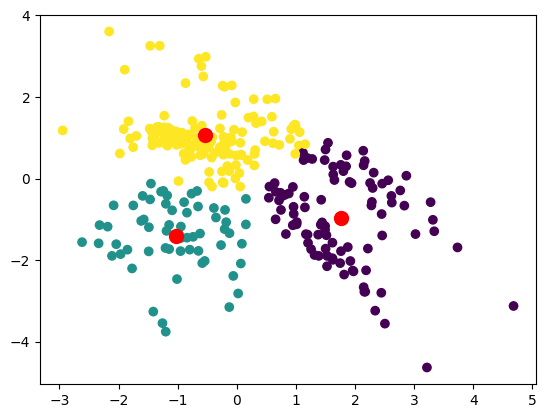

In [126]:
from myKmeans_realization import myKmeans

mkm = labels, centers = myKmeans(data, 3)

plt.scatter(data[:,0], data[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], s=100, c='red')

In [129]:
from myKmeans_realization import calculate_inertia

inertia = calculate_inertia(data, labels, centers)
float(inertia)

381.4945325864433

In [122]:
get_internal_metrics(data, labels)
get_external_metrics(data_y, labels)

Средний индекс силуэта: 0.472
Индекс Калински-Харабаша: 298.634
Нормированная взаимная информация: 0.414
Уровень гомогеничности: 0.517


Сравним с реализацией sklearn

In [123]:
from sklearn.cluster import KMeans

kmeans = KMeans(3, n_init='auto').fit(data)

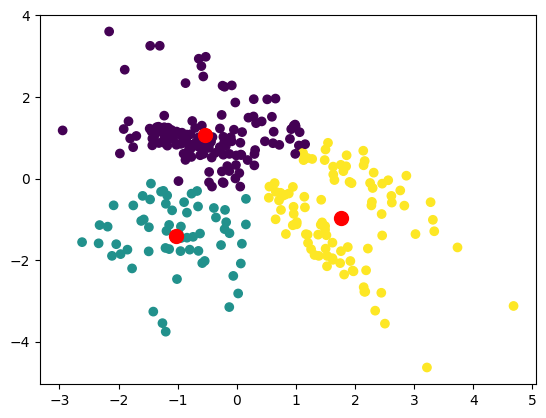

In [124]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [125]:
kmeans.inertia_

381.49453258644326

In [118]:
get_internal_metrics(data, kmeans.labels_)
get_external_metrics(data_y, kmeans.labels_)

Средний индекс силуэта: 0.472
Индекс Калински-Харабаша: 298.685
Нормированная взаимная информация: 0.410
Уровень гомогеничности: 0.513
